In [1]:
from google.colab import drive
drive.mount('/gdrive')
path='/gdrive/My Drive/Colab Notebooks/'

Mounted at /gdrive


In [2]:
import pandas as pd
data=pd.read_csv(path+'House_Rent_Dataset.csv')

In [3]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

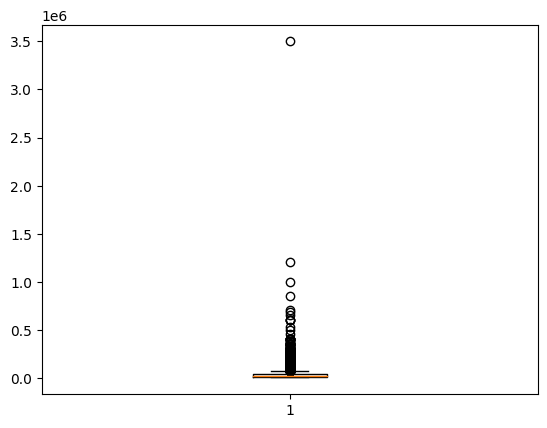

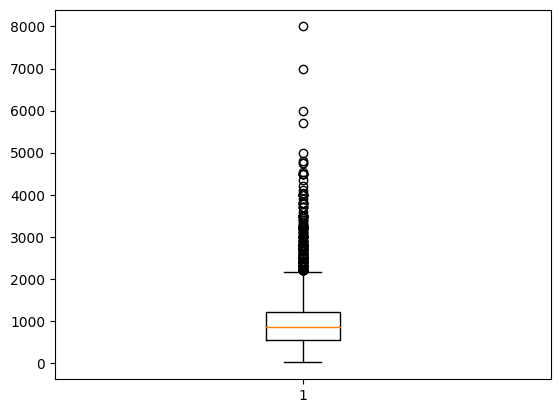

In [5]:
import matplotlib.pyplot as plt
for i in [2,3]:
  plt.boxplot(data.iloc[:,i])
  plt.show()

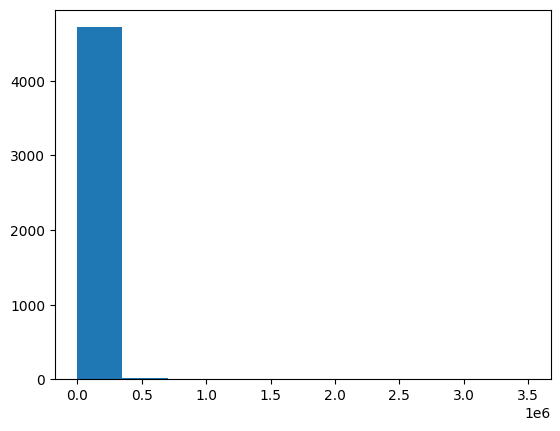

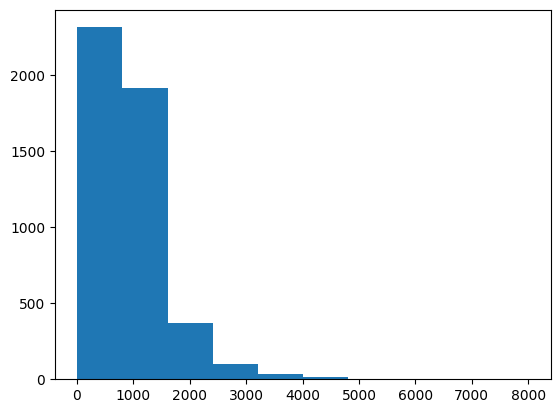

In [6]:
import matplotlib.pyplot as plt
for i in [2,3]:
  plt.hist(data.iloc[:,i])
  plt.show()

In [7]:
data.iloc[:,[2,3]].describe()

,Rent,Size
count,4.746000e+03,4746.000000
mean,3.499345e+04,967.490729
std,7.810641e+04,634.202328
min,1.200000e+03,10.000000
25%,1.000000e+04,550.000000
50%,1.600000e+04,850.000000
75%,3.300000e+04,1200.000000
max,3.500000e+06,8000.000000


In [8]:
data.shape

(4746, 12)

In [9]:
import numpy as np
outlier_indices_1 = np.where((data.iloc[:,2] > 3000000))
outlier_indices_2 = np.where((data.iloc[:,3] > 5000))
data.drop(outlier_indices_1[0],inplace=True)
data.drop(outlier_indices_2[0],inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
df1=data.iloc[:,4:10]
df1

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors
...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family


In [12]:
df1.drop('Area Locality',axis=1,inplace=True)

In [13]:
df2=data.select_dtypes(include=[int,float])
df2

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [14]:
for i in df1.columns:
  dummy=pd.get_dummies(df1[i],prefix=i)
  df2=pd.concat([df2,dummy],axis=1)


In [15]:
df2.shape

(4741, 498)

In [16]:
df2.head(10)

,BHK,Rent,Size,Bathroom,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 13,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5,2,7000,600,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6,2,10000,700,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,1,5000,250,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
8,2,26000,800,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
9,2,10000,1000,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
y=df2['Rent']
x=df2.iloc[:,2:]
z=df2.iloc[:,0]

In [18]:
x=pd.concat([z,x],axis=1)
x

,BHK,Size,Bathroom,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 13,Floor_1 out of 14,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,1100,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2,800,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1000,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,2,800,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,850,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4742,3,2000,3,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4743,3,1750,3,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4744,3,1500,2,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression(fit_intercept=False)

In [21]:
reg_model.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [22]:
y_pred=reg_model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -66496308597467701248.00


In [24]:
print(reg_model.score(x,y))

-1.505126421395216e+17


In [25]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
k=model.fit(x_train,y_train)
ypred=k.predict(x_test)
Accuracy1=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy1)

 Accuracy of the model is -66496308597467701248.00


In [26]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
k=model.fit(x_train,y_train)
ypred=k.predict(x_test)
Accuracy2=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy2)

 Accuracy of the model is -66496308597467701248.00


In [27]:
import statsmodels.api as sm

#add constant to predictor variables
X = sm.add_constant(x_train)

#fit linear regression model
fit = sm.OLS(y_train,x_train).fit()

#view model summary
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     19.03
Date:                Tue, 30 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:49:03   Log-Likelihood:                -44656.
No. Observations:                3792   AIC:                         9.018e+04
Df Residuals:                    3360   BIC:                         9.287e+04
Df Model:                         431                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BHK   

Market Segmentation

In [28]:
df2

,BHK,Rent,Size,Bathroom,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 13,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,17000,1000,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,2,10000,800,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4742,3,29000,2000,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4743,3,35000,1750,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4744,3,45000,1500,2,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
df2.drop(['BHK','Rent','Size','Bathroom'],axis=1,inplace=True)

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
MD_pca=pca.fit_transform(df2)
MD_p=pca.fit(df2)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,7.877558e-01,1.862881e-01,0.186288
PC2,6.642587e-01,1.324575e-01,0.318746
PC3,5.059154e-01,7.683476e-02,0.395580
PC4,4.418528e-01,5.860804e-02,0.454188
PC5,4.353265e-01,5.688950e-02,0.511078
...,...,...,...
PC490,8.507115e-16,2.172534e-31,1.000000
PC491,7.873673e-16,1.861044e-31,1.000000
PC492,6.940907e-16,1.446220e-31,1.000000
PC493,6.918387e-16,1.436851e-31,1.000000


In [31]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=df2.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.7 0.5 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC485,PC486,PC487,PC488,PC489,PC490,PC491,PC492,PC493,PC494
Floor_1,0.000,0.000,-0.000,-0.002,-0.000,0.001,-0.000,0.001,0.000,-0.001,...,0.003,0.004,-0.003,-0.012,-0.033,-0.001,0.001,-0.000,0.000,-0.046
Floor_1 out of 1,-0.002,-0.019,-0.017,0.028,-0.013,0.001,-0.017,0.036,-0.008,-0.002,...,-0.003,0.002,0.001,0.003,-0.018,-0.001,0.001,-0.000,0.000,-0.046
Floor_1 out of 10,-0.001,0.001,0.000,0.001,0.001,0.001,0.000,0.001,0.001,0.001,...,0.002,0.005,0.003,0.006,-0.013,-0.001,0.001,-0.000,0.000,-0.046
Floor_1 out of 11,-0.000,-0.000,0.000,0.000,-0.001,-0.001,-0.001,0.001,0.001,0.000,...,-0.026,0.096,-0.127,0.011,-0.103,-0.001,0.001,-0.000,0.000,-0.046
Floor_1 out of 12,-0.001,-0.000,-0.001,-0.001,0.000,0.000,-0.001,0.001,0.001,-0.002,...,-0.003,-0.003,-0.003,-0.011,-0.034,-0.001,0.001,-0.000,0.000,-0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Furnishing Status_Semi-Furnished,0.037,0.699,-0.196,0.154,-0.005,0.263,0.093,-0.156,-0.099,0.032,...,-0.003,-0.001,-0.005,-0.001,-0.001,0.317,0.397,-0.188,0.200,-0.001
Furnishing Status_Unfurnished,0.001,-0.671,-0.076,0.254,0.146,0.223,0.212,-0.113,0.121,-0.020,...,0.004,0.001,-0.003,-0.001,-0.000,0.317,0.397,-0.188,0.200,-0.001
Tenant Preferred_Bachelors,-0.247,-0.085,-0.482,-0.126,0.106,-0.123,-0.165,-0.088,-0.105,0.525,...,-0.002,0.006,0.000,-0.006,0.002,-0.432,0.363,-0.070,-0.102,0.016
Tenant Preferred_Bachelors/Family,0.341,0.061,0.607,0.303,0.105,0.152,-0.161,0.056,0.035,0.145,...,0.001,-0.004,0.002,-0.005,-0.001,-0.432,0.363,-0.070,-0.102,0.016


In [32]:
pip install bioinfokit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=b581ba74ee4ba36bb5c3bbb235af50a486e0a118f2593de31c6ba2938f335b6c
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


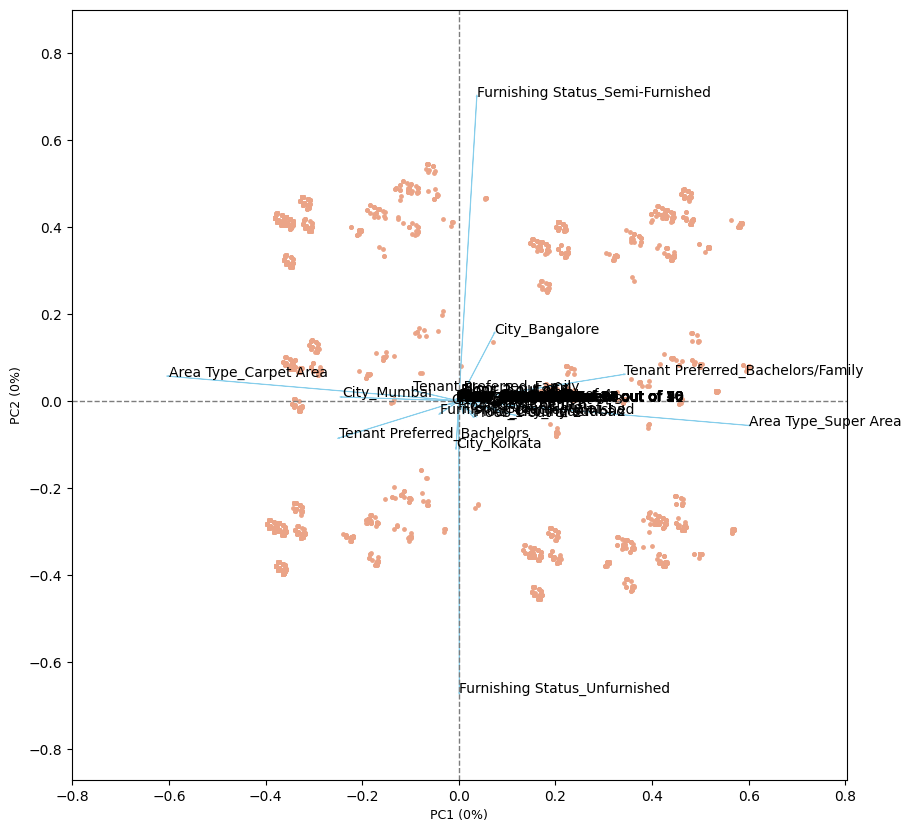

In [33]:
from bioinfokit.visuz import cluster
cluster.biplot(cscore=MD_pca, loadings=-load, labels=df2.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

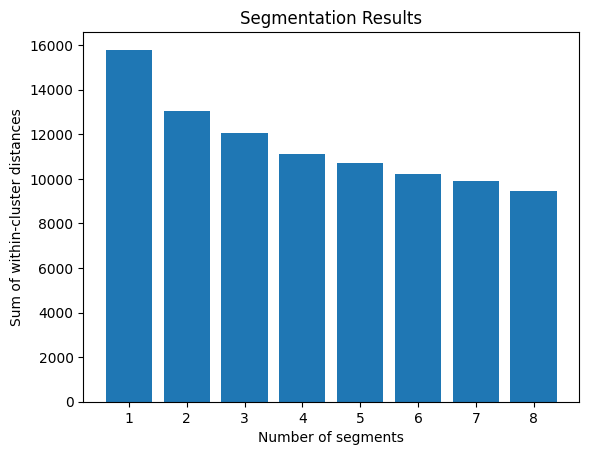

In [34]:
from sklearn.cluster import KMeans

np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []


for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(df2)
    within_cluster_distances.append((kmeans.inertia_))

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()


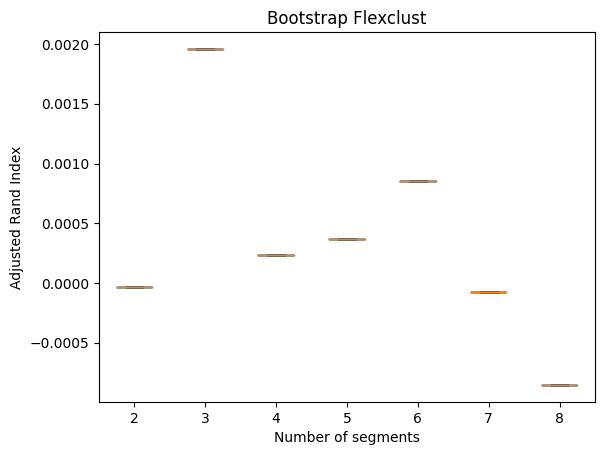

In [35]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(df2.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(df2.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()